# Relatorio Final de Laboratório 
## Física Aplicada à Computação
## Licenciatura em Engenharia Informática - ESTIG 
## Ano Letivo 23/24
#### Autor: Ângelo Teresa - 25441


# Introdução

#### Este projeto final de laboratório consiste na aplicação de conhecimentos e práticas que foram previamente desenvolvidas nas aulas de laboratória da Unidade curricular.
#### Este projeto consiste:
    
   >* Aquisição de dados através do Arduio Nano RP2040;
   >* Tratamento dos dados;
   >* Visualização na forma de gráficos, histogramas e correlações;
   >* Cálculo de Grandezas (Média, mediana, máximo, mínimo e desvio padrão)
     

#### Em duas tarefas T1 e T2 
    
   >* Tarefa 1 - Leitura e tratamento de dados e os seus respetivos gráficos e grandezas.
   >* Tarefa 2 - Tratamento de dados fornecidos pelo professor e os seus respetivos gráficos, grandezas e o coeficiente de coorelação de Pearson
     

# T1 Arduino: aquisição, tratamento e visiualização dados de sensor

#  1.1 - Sketch do arduino que lê os valores do sensor de temperatura e mede o tempo que demora a leitura



# 1.2 - Aquisição de Dados enviados pelo Arduino

## 1.2.1 - Verificação de  Portas COM Disponíveis


In [27]:
#NOTA IMPORTANTE: correr sempre esta célula antes de qualquer célula abaixo
import sys
import serial
import serial.tools.list_ports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Portas disponíveis
available_ports = serial.tools.list_ports.comports()

#Informação das portas disponíveis
for port in available_ports:
    print(f'Port:\t{port.device}\nDesc.:\t{port.description}\nHWID:\t{port.hwid}\nFab.:\t{port.manufacturer}')

Port:	COM4
Desc.:	Dispositivo de Série USB (COM4)
HWID:	USB VID:PID=2341:005E SER=06C63450087F917A LOCATION=1-3:x.0
Fab.:	Microsoft


## 1.2.3 -  Abertura da comunicação com a porta COM indetificada anteriormente

In [28]:
ser = serial.Serial()
# A taxa de transmissão defenida tambem no Arduino
ser.baudrate = 9600
ser.port = port.device
ser.timeout = 2000

# a instrução seguinte mostra a informação sobre a conexão sem formatação
# print(ser)

print('Informação sobre a conexão:\n')
print('Connexão à porta ' + ser.portstr)
print('Config. da porta:\n\t\tBaudrate: {0}\n\t\tParity Bits: {1}\n\t\tByte size: {2}\n\t\tStop bits: {3}:\n\t\tTimeout: {4}'.
      format(ser.baudrate, ser.parity, ser.bytesize, ser.stopbits, ser.timeout))

Informação sobre a conexão:

Connexão à porta COM4
Config. da porta:
		Baudrate: 9600
		Parity Bits: N
		Byte size: 8
		Stop bits: 1:
		Timeout: 2000


## 1.3 - Leitura de dados do Arduino

#### O código seguinte lê os dados enviados pelo Arduino até ao número de séries de aquisição que o utilizador indicar e depois divide a String a quando occore o "." e indica a temperatura e o tempo que demora a leitura da mesma temperatura e quando o número de aqusições indicadas pelo utilizador for atingida a comunicação termina.

In [29]:
N = int(input('Número de séries de aquisição: '))
limiteAmostras = range(1,N+1)

if not ser.is_open:
    print('\nA conexão será aberta.')
    ser.open()

dados_tempo = []
dados_temperatura = []
contagem_dados = 0
contagem_series = 0

print('Adquirindo dados...')

try:
    
    for _ in limiteAmostras:
        linha = ser.readline().decode().strip()
        dados = linha.split('.')
        if len(dados) == 3:
            dados_tempo.append(int(dados[0]))
            dados_temperatura.append(float(dados[1]))
finally:
    ser.close()
    print('Recolha de dados concluida')
    print('A fechar a porta' )
    ser.close()



Número de séries de aquisição: 250

A conexão será aberta.
Adquirindo dados...
Recolha de dados concluida
A fechar a porta


In [30]:
#Criação do ficheiro e do local de armazenamento 
filename = 'dados_sensor_raw'
filepath = 'Ficheiros/' + filename

#Criação dos dataframes com as listas obtidas
df = pd.DataFrame({'Tempo': dados_tempo, 'Temperatura': dados_temperatura})
df.to_csv('dados_sensor_raw.csv', index=False)

print('Dados salvos em dados_sensor_raw.csv. Programa concluído.')

Dados salvos em dados_sensor_raw.csv. Programa concluído.


# 1.4 - Geração de gráficos a partir dos dados que adquirimos anteriormente



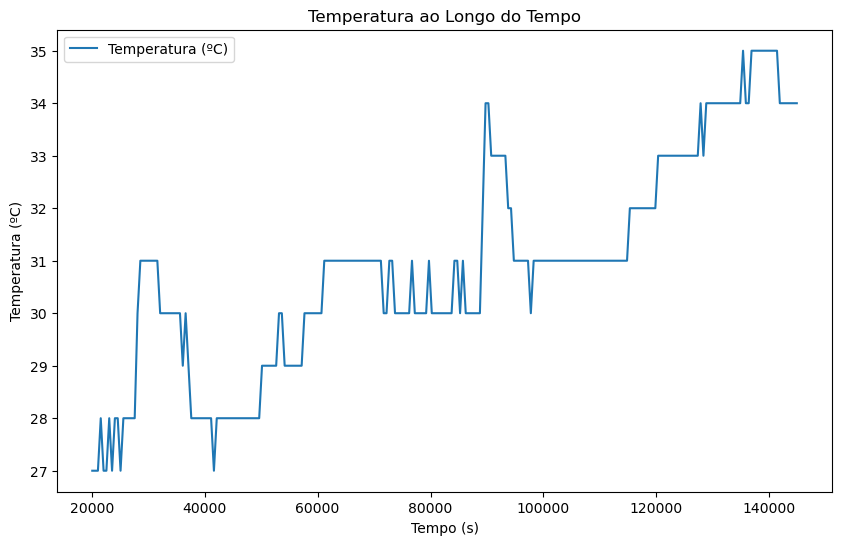

In [31]:
# Carrega os dados do ficheiro csv
df = pd.read_csv('dados_sensor_raw.csv')

# Cria o gráfico
plt.figure(figsize=(10, 6))

# Adiciona as curvas da tempratura ao grafico
plt.plot(df['Tempo'], df['Temperatura'], label='Temperatura (ºC)')


# Indentifica os conteudos do grafico
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (ºC)')
plt.title('Temperatura ao Longo do Tempo')

# Adiciona uma legenda
plt.legend()

# Exibe o gráfico
plt.show()

# 1.5 - Cálculo da média,mediana,maximo,minimo e desvio padrão


#### Através do seguinte código em python, e dos dados adquiridos, podemos fazer os cálculos das grandezas


In [32]:
# Carrega os dados do ficheiro csv 
df = pd.read_csv('dados_sensor_raw.csv')

# Cálculo das grandezas
media_temperatura = df['Temperatura'].mean()
mediana_temperatura = df['Temperatura'].median()
desvio_padrao_temperatura = df['Temperatura'].std()
max_temperatura = df['Temperatura'].max()
min_temperatura = df['Temperatura'].min()



# Mostra os resultados
print(f'Estatísticas de Temperatura:')
print(f'Média: {media_temperatura:.2f}')
print(f'Mediana: {mediana_temperatura:.2f}')
print(f'Desvio Padrão: {desvio_padrao_temperatura:.2f}')
print(f'Máximo: {max_temperatura:.2f}')
print(f'Mínimo: {min_temperatura:.2f}')
print('\n')



Estatísticas de Temperatura:
Média: 30.87
Mediana: 31.00
Desvio Padrão: 2.03
Máximo: 35.00
Mínimo: 27.00




# 1.6 - Histograma


#### O seguine código em python vai nos permitir realizar um histograma com o dados da temperatura fornecidos pelo arduino 

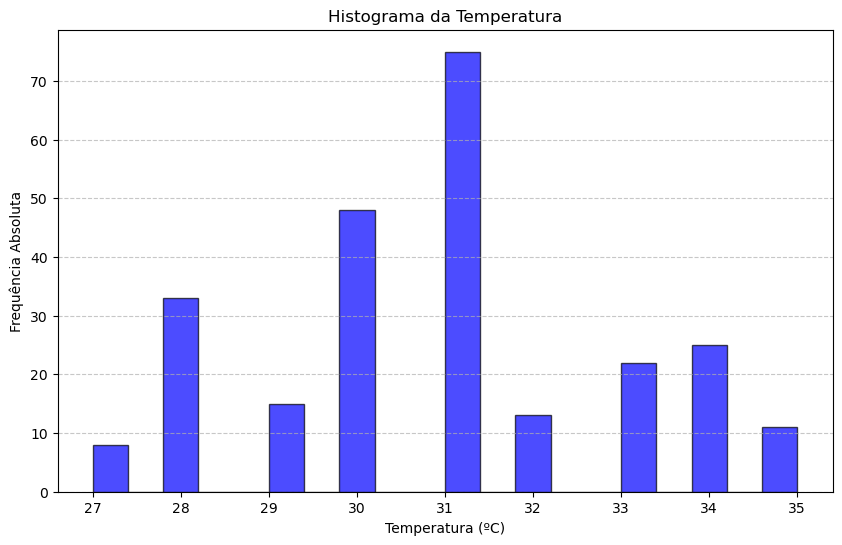

In [40]:
#  Carrega os dados do ficheiro 
df = pd.read_csv('dados_sensor_raw.csv')

#Criação de um histograma com os dados da temperatura 
plt.figure(figsize=(10, 6))
plt.hist(df['Temperatura'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histograma da Temperatura')
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequência Absoluta')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# 1.7 - Ficheiro (report.txt)

#### O seguinte código python vai criar um ficheiro (report.txt) que vai conter a informação e as estatísticas da temperatura 

### Temperatura

#### A média de tempratura registada foi de 30.87 graus Celsius, com uma variação máxima de 35 graus Celsius e minima de 27 graus Celsius e com um desvio padrão de 2.03.


In [34]:
# Carregue os dados do arquivo CSV
df = pd.read_csv('dados_sensor_raw.csv')

# Cálculos estatísticos
media_temperatura = df['Temperatura'].mean()
mediana_temperatura = df['Temperatura'].median()
desvio_padrao_temperatura = df['Temperatura'].std()
max_temperatura = df['Temperatura'].max()
min_temperatura = df['Temperatura'].min()



# Crie o conteúdo do relatório
report_content = f"""Relatório dos Dados Adquiridos - Arduino RP2040


Estatísticas da Temperatura:
  - Média: {media_temperatura:.2f}
  - Mediana: {mediana_temperatura:.2f}
  - Desvio Padrão: {desvio_padrao_temperatura:.2f}
  - Máximo: {max_temperatura:.2f}
  - Mínimo: {min_temperatura:.2f}
"""

# Salve o relatório em um arquivo "report.txt" com UTF-8 encoding
with open('report.txt', 'w', encoding='utf-8-sig') as report_file:
    report_file.write(report_content)

# Exiba uma mensagem informando que o relatório foi gerado
print('Relatório gerado com sucesso. Consulte o arquivo "report.txt".')



Relatório gerado com sucesso. Consulte o arquivo "report.txt".


# T2 - Arduino Nano (dados reais)


### Vamos repetir o processo que fizemos anterioremente no 1.4 até ao 1.7 mas desta vez com os dados recolhidos e fornecidos pelo docente Nuno Pereira

#### 2.8 - O seguinte código em python vai recholher os dados que o professor forneceu na pasta dados_sensor.cv e vai criar um gráfico

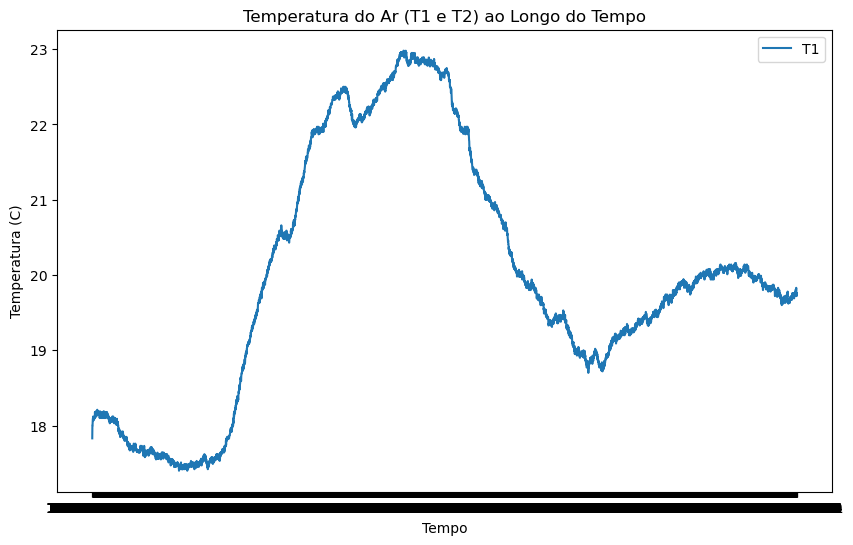

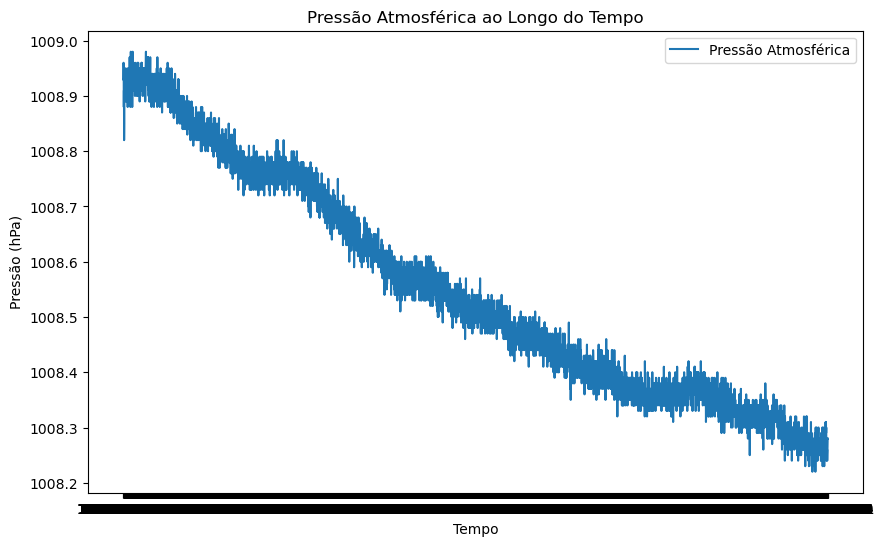

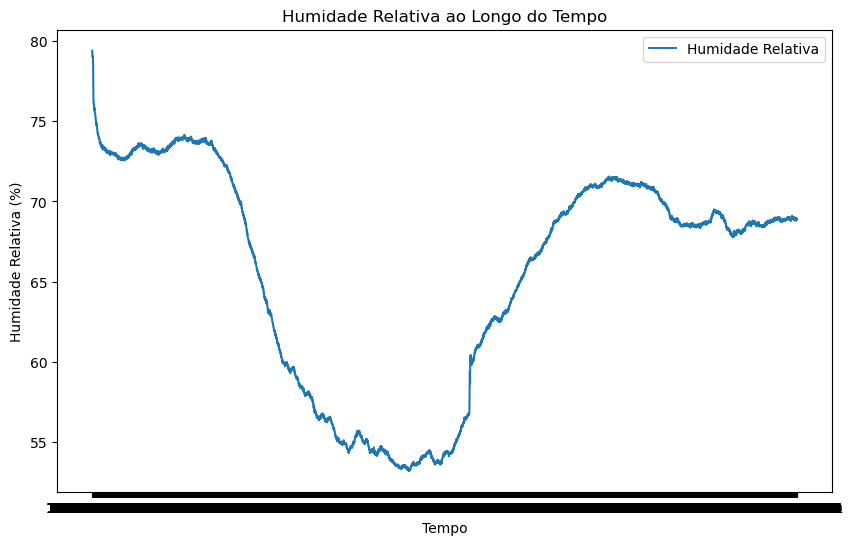

Relatório gerado com sucesso. Consulte o arquivo "report_sensores_reais.txt".


In [42]:
# Carrega os dados do ficheiro csv
df_sensores = pd.read_csv('dados_sensores.csv')

# limpa a string 
df_sensores.columns = df_sensores.columns.str.strip().str.replace("'", "")

#Função para fazer os graficos e mostrar
def plot_graph(x, y, label, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(df_sensores['HH:MM:SS.SSS'], df_sensores[y], label=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Gráficos de Temperatura (T1 e T2)
plot_graph('HH:MM:SS.SSS', 'T1(C)', 'T1', 'Temperatura do Ar (T1 e T2) ao Longo do Tempo', 'Tempo', 'Temperatura (C)')


# Gráfico de Pressão Atmosférica (P)
plot_graph('HH:MM:SS.SSS', 'P(hPa)', 'Pressão Atmosférica', 'Pressão Atmosférica ao Longo do Tempo', 'Tempo', 'Pressão (hPa)')

# Gráfico de Humidade Relativa (HR)
plot_graph('HH:MM:SS.SSS', 'HR(%)', 'Humidade Relativa', 'Humidade Relativa ao Longo do Tempo', 'Tempo', 'Humidade Relativa (%)')


# Função para calculos das estatísticas
def calculate_statistics(column_name):
    media = df_sensores[column_name].mean()
    mediana = df_sensores[column_name].median()
    desvio_padrao = df_sensores[column_name].std()
    maximo = df_sensores[column_name].max()
    minimo = df_sensores[column_name].min()
    
    return media, mediana, desvio_padrao, maximo, minimo

# Estatísticas da Temperatura (T1)
stats_t1 = calculate_statistics('T1(C)')

# Estatísticas da Temperatura (T2)
stats_t2 = calculate_statistics('T2(C)')

# Estatísticas da Pressão Atmosférica (P)
stats_p = calculate_statistics('P(hPa)')

# Estatísticas da Humidade Relativa (HR)
stats_hr = calculate_statistics('HR(%)')


# Conteudo do relatório
report_content_sensores_reais = f"""Relatório dos Dados Adquiridos - Dados Reais



Estatísticas da Temperatura (T1):
  - Média: {stats_t1[0]:.2f}
  - Mediana: {stats_t1[1]:.2f}
  - Desvio Padrão: {stats_t1[2]:.2f}
  - Máximo: {stats_t1[3]:.2f}
  - Mínimo: {stats_t1[4]:.2f}

Estatísticas da Temperatura (T2):
  - Média: {stats_t2[0]:.2f}
  - Mediana: {stats_t2[1]:.2f}
  - Desvio Padrão: {stats_t2[2]:.2f}
  - Máximo: {stats_t2[3]:.2f}
  - Mínimo: {stats_t2[4]:.2f}

Estatísticas da Pressão Atmosférica:
  - Média: {stats_p[0]:.2f}
  - Mediana: {stats_p[1]:.2f}
  - Desvio Padrão: {stats_p[2]:.2f}
  - Máximo: {stats_p[3]:.2f}
  - Mínimo: {stats_p[4]:.2f}

Estatísticas da Humidade Relativa:
  - Média: {stats_hr[0]:.2f}
  - Mediana: {stats_hr[1]:.2f}
  - Desvio Padrão: {stats_hr[2]:.2f}
  - Máximo: {stats_hr[3]:.2f}
  - Mínimo: {stats_hr[4]:.2f}

"""

# Salva o relatório em um arquivo "report_sensores_reais.txt" com UTF-8 encoding
with open('report_sensores_reais.txt', 'w', encoding='utf-8-sig') as report_file:
    report_file.write(report_content_sensores_reais)


# Mostra uma mensagem informando que o relatório foi gerado
print('Relatório gerado com sucesso. Consulte o arquivo "report_sensores_reais.txt".')



## O seguintes Gráficos vão mostrar a coorelação entre alguns dados medidos


#### O seguinte código em python vai criar um gráfico com a coorelação entre as temperaturas T1 e T2

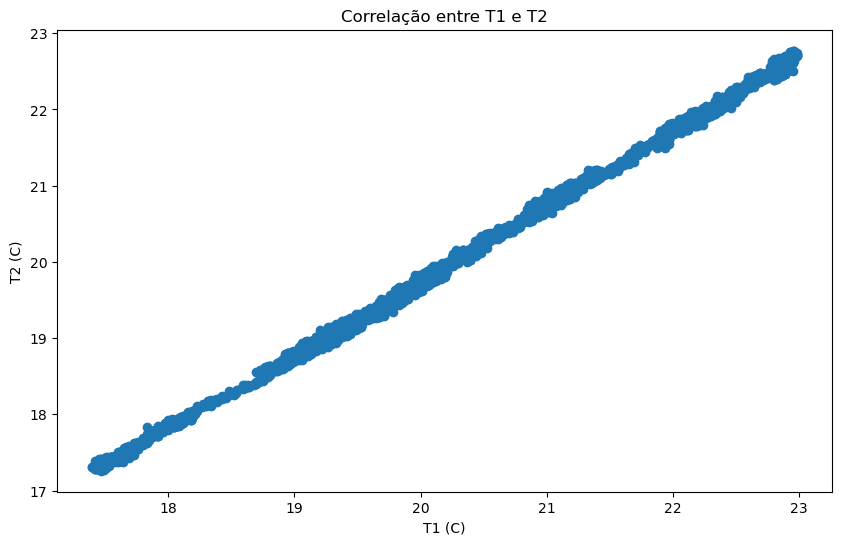

In [36]:
# Carrega os dados do ficheiro csv
df_sensores = pd.read_csv('dados_sensores.csv')

# Limpa a string
df_sensores.columns = df_sensores.columns.str.strip().str.replace("'", "")

# Cria um gráfico para a correlação entre T1 e T2
plt.figure(figsize=(10, 6))
plt.scatter(df_sensores['T1(C)'], df_sensores['T2(C)'])
plt.title('Correlação entre T1 e T2')
plt.xlabel('T1 (C)')
plt.ylabel('T2 (C)')
plt.show()

#### O seguinte código em python vai criar um gráfico com a coorelação entre a temperatura T1 e a pressão atmosférica P

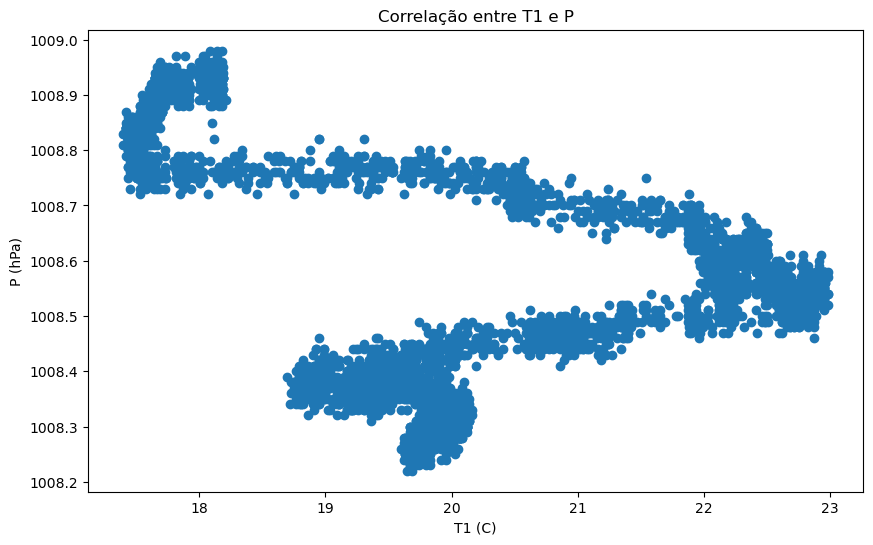

In [37]:
# Carrega os dados do ficheiro csv
df_sensores = pd.read_csv('dados_sensores.csv')

# Limpa a string
df_sensores.columns = df_sensores.columns.str.strip().str.replace("'", "")


# Cria um gráfico para a correlação entre T1 e P
plt.figure(figsize=(10, 6))
plt.scatter(df_sensores['T1(C)'], df_sensores['P(hPa)'])
plt.title('Correlação entre T1 e P')
plt.xlabel('T1 (C)')
plt.ylabel('P (hPa)')
plt.show()

#### O seguinte código em python vai criar um gráfico com a coorelação entre a temperatura T1 e a Humidade relativa HR

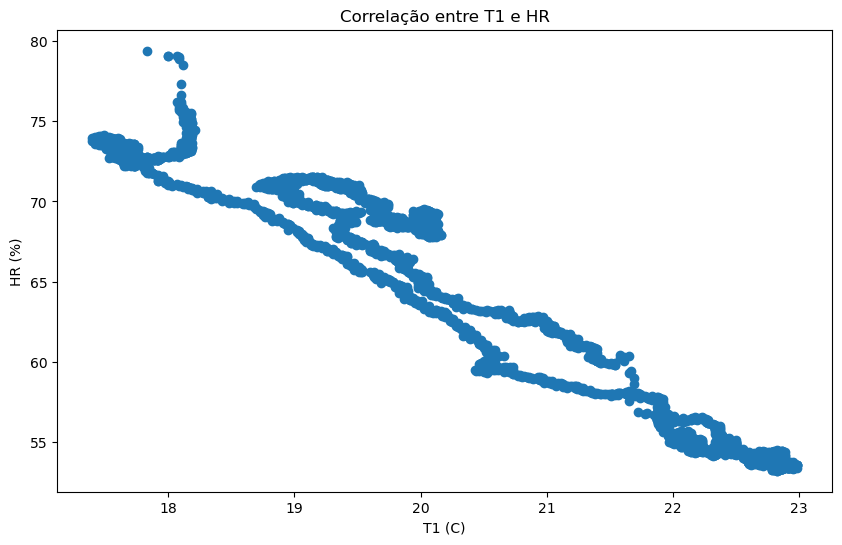

In [38]:
# Carrega os dados do ficheiro csv
df_sensores = pd.read_csv('dados_sensores.csv')

# Limpa a string
df_sensores.columns = df_sensores.columns.str.strip().str.replace("'", "")


# Cria um gráfico para a correlação entre T1 e HR
plt.figure(figsize=(10, 6))
plt.scatter(df_sensores['T1(C)'], df_sensores['HR(%)'])
plt.title('Correlação entre T1 e HR')
plt.xlabel('T1 (C)')
plt.ylabel('HR (%)')
plt.show()

## 2.10 - Coeficiente de correlação de Pearson
### O coeficiente de correlação de Pearson é uma medida estatística que avalia a relação linear entre duas variáveis. Ele varia de -1 a 1, onde -1 indica uma correlação negativa perfeita, 1 indica uma correlação positiva perfeita e 0 indica ausência de correlação linear.

#### O seguinte código vai realizar o coeficiente de coorelação de Pearson entre os dados da temperatura T1 e T2 

In [39]:
# Carrega os dados do ficheiro csv
df_sensores = pd.read_csv('dados_sensores.csv')

# Limpa a string
df_sensores.columns = df_sensores.columns.str.strip().str.replace("'", "")

# Retira os dados de T1 e T2
dados_T1 = df_sensores['T1(C)']
dados_T2 = df_sensores['T2(C)']

# Calcula o coeficiente de correlação de Pearson
coeficiente_correlacao = np.corrcoef(dados_T1, dados_T2)[0, 1]

# Da print no coeficiente de correlação
print(f"Coeficiente de correlação de Pearson entre T1 e T2: {coeficiente_correlacao:.2f}")

Coeficiente de correlação de Pearson entre T1 e T2: 1.00


# Conclusão

#### Após a conclusão deste trabalho final de  laboratório concluí que aprendi melhor os conceitos do Python, do Jupyter Notebook e especialmente no que toca à implementação de código em C para o Arduino, visto que não tinha muitos conhecimentos no que toca a trabalhar com o Arduino em geral.
#### Foi um projeto em que foram superados alguns obstáculos que conseguiram ser superados, quer sejam problemas na porta série de comunicação do Arduino  como também alguns erros de sintaxe, mas que no fim consegui resolver todos esses erros e entender o porquê dos mesmos.
#### Por fim, penso que foi um trabalho bem elaborado em que consegui cumprir os objetivos propostos no enunciado e penso que este projeto tenha ficado bastante bem implementado e foi um grande desafio que me fez obter melhores conhecimentos no que toca à linguagem de Python e C, compreender o propósito e funcionamento do Arduino e a desenvolver um documento computacional através do Jupyter Notebook.

# Referências

### https://cms.ipbeja.pt/mod/folder/view.php?id=213295
### https://cms.ipbeja.pt/mod/folder/view.php?id=110848
### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html